In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pandas_profiling
import seaborn as sns
import datetime as dt

import xgboost as xgb# for XGBoost algorithm
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# Set the default plot size
plt.rcParams['figure.figsize'] = [15, 8]
# set a grid for each plot too
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("C:\\Users\\20109\\Downloads\\archive\\solar_weather.csv", index_col='Time', parse_dates=True)

In [3]:
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
Time,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196776 entries, 2017-01-01 00:00:00 to 2022-08-31 17:45:00
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Energy delta[Wh]        196776 non-null  int64  
 1   GHI                     196776 non-null  float64
 2   temp                    196776 non-null  float64
 3   pressure                196776 non-null  int64  
 4   humidity                196776 non-null  int64  
 5   wind_speed              196776 non-null  float64
 6   rain_1h                 196776 non-null  float64
 7   snow_1h                 196776 non-null  float64
 8   clouds_all              196776 non-null  int64  
 9   isSun                   196776 non-null  int64  
 10  sunlightTime            196776 non-null  int64  
 11  dayLength               196776 non-null  int64  
 12  SunlightTime/daylength  196776 non-null  float64
 13  weather_type            196776 non-null 

In [5]:
df.isSun.unique()

array([0, 1], dtype=int64)

In [5]:
df.index.name

'Time'

In [6]:
df.index.dtype

dtype('<M8[ns]')

In [7]:
# desciption of the data
df.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


In [8]:
# Any nulls - no
df.isna().sum()

Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

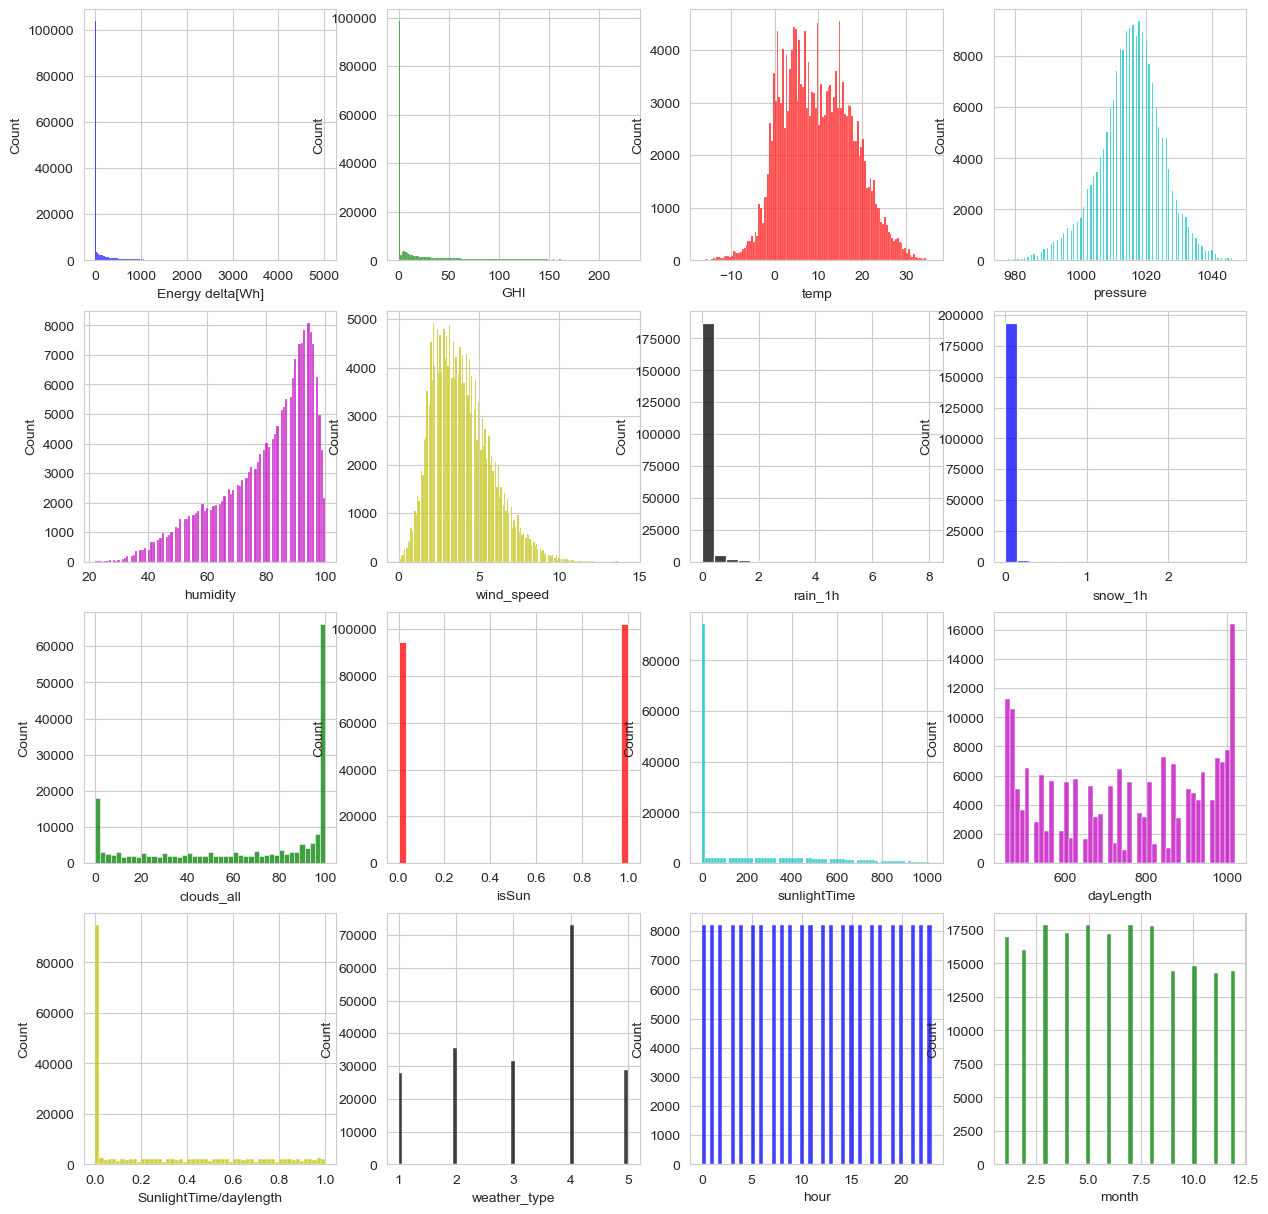

In [9]:
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
colours = "bgrcmykbgrcmykbg"

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through the columns and create separate plots
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], color=colours[i])  

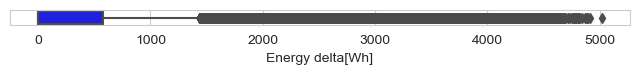

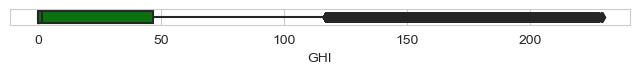

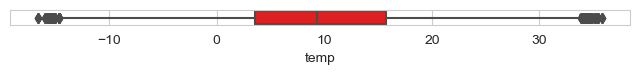

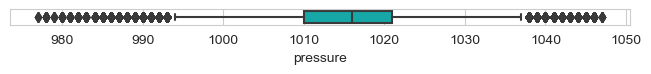

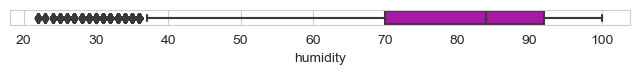

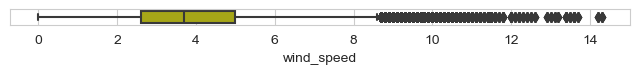

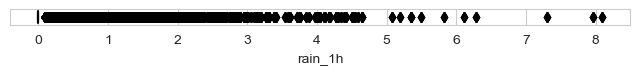

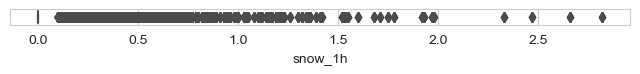

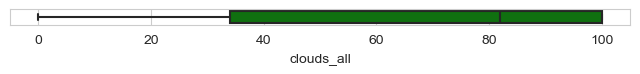

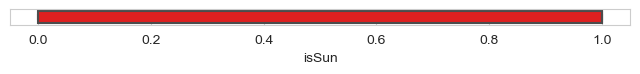

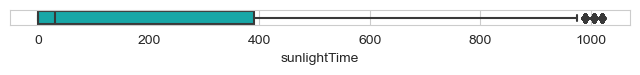

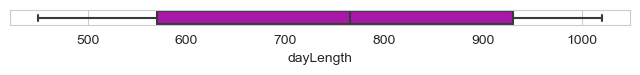

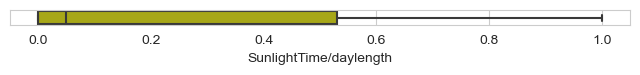

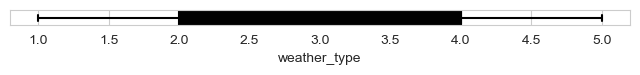

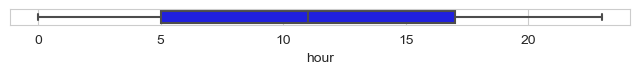

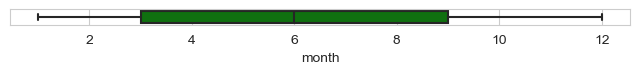

In [10]:
# Boxplots of all the data
colours = "bgrcmykbgrcmykbg"
i=0
for column in df:    
    fig,ax = plt.subplots(figsize=(8,0.2))
    sns.boxplot(data=df, x=column, color= colours[i]) 
    i+=1

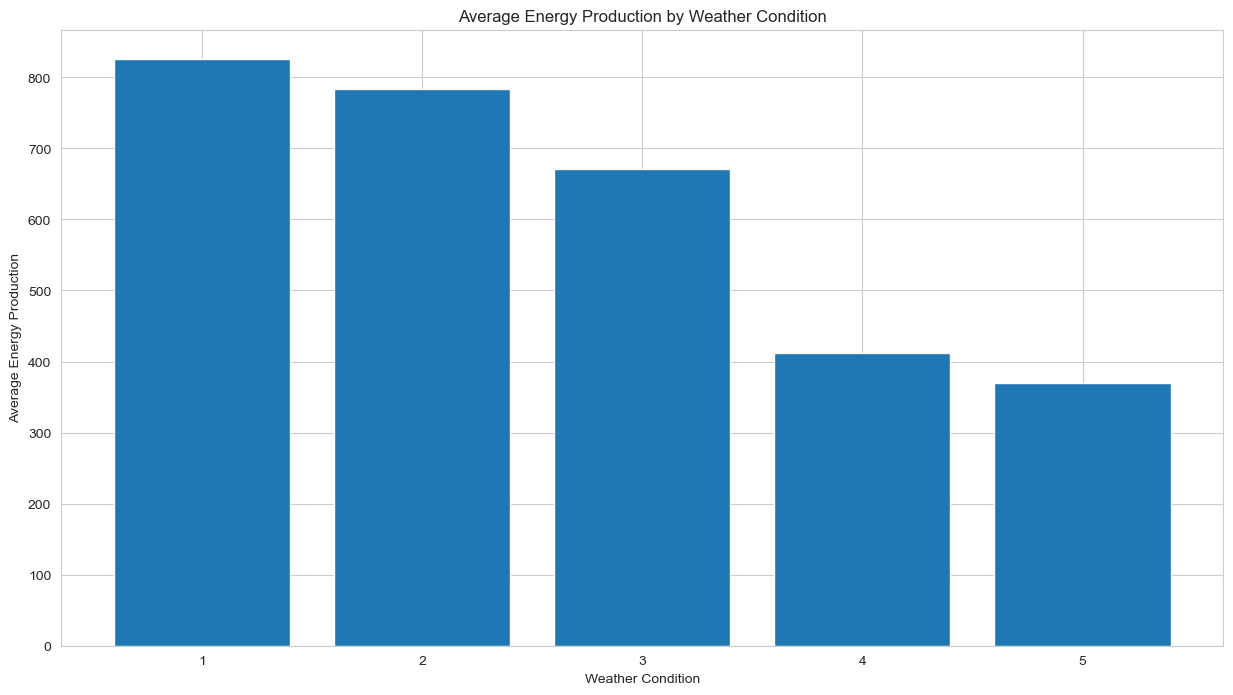

In [11]:
avg_energy = df.groupby("weather_type")["Energy delta[Wh]"].mean()
plt.bar(avg_energy.index, avg_energy.values)
plt.title("Average Energy Production by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Energy Production")
plt.show()

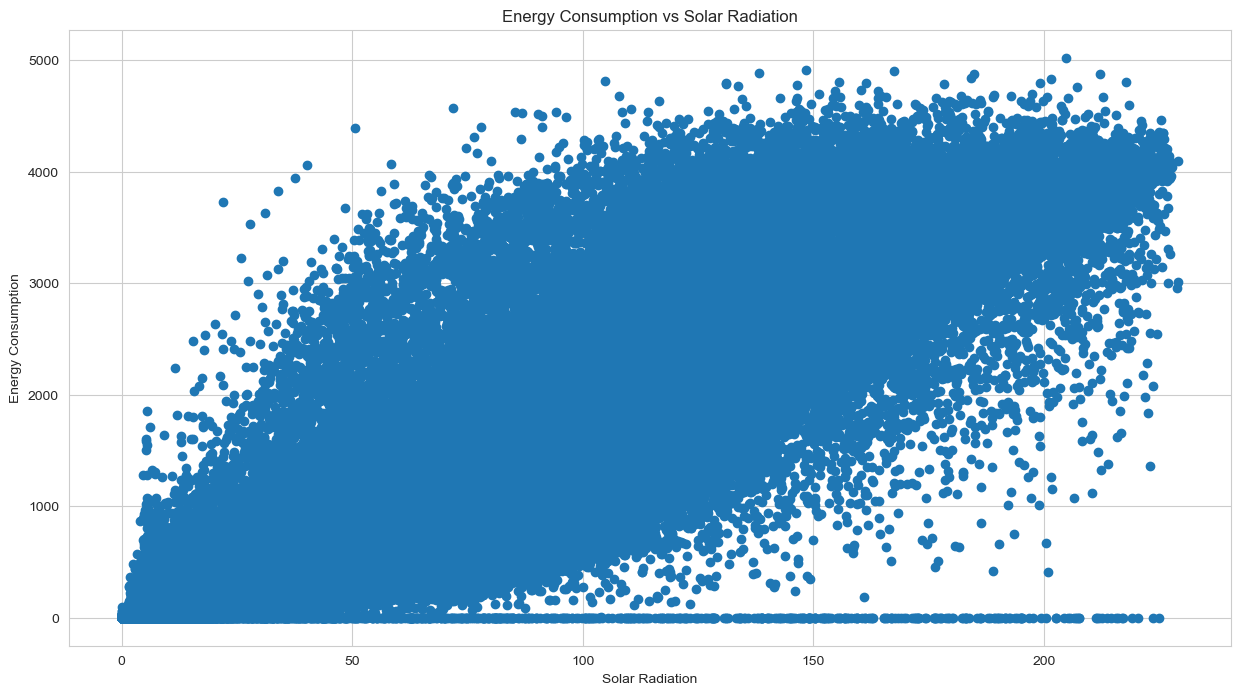

In [12]:
plt.scatter(df["GHI"], df["Energy delta[Wh]"])
plt.title("Energy Consumption vs Solar Radiation")
plt.xlabel("Solar Radiation")
plt.ylabel("Energy Consumption")
plt.show()

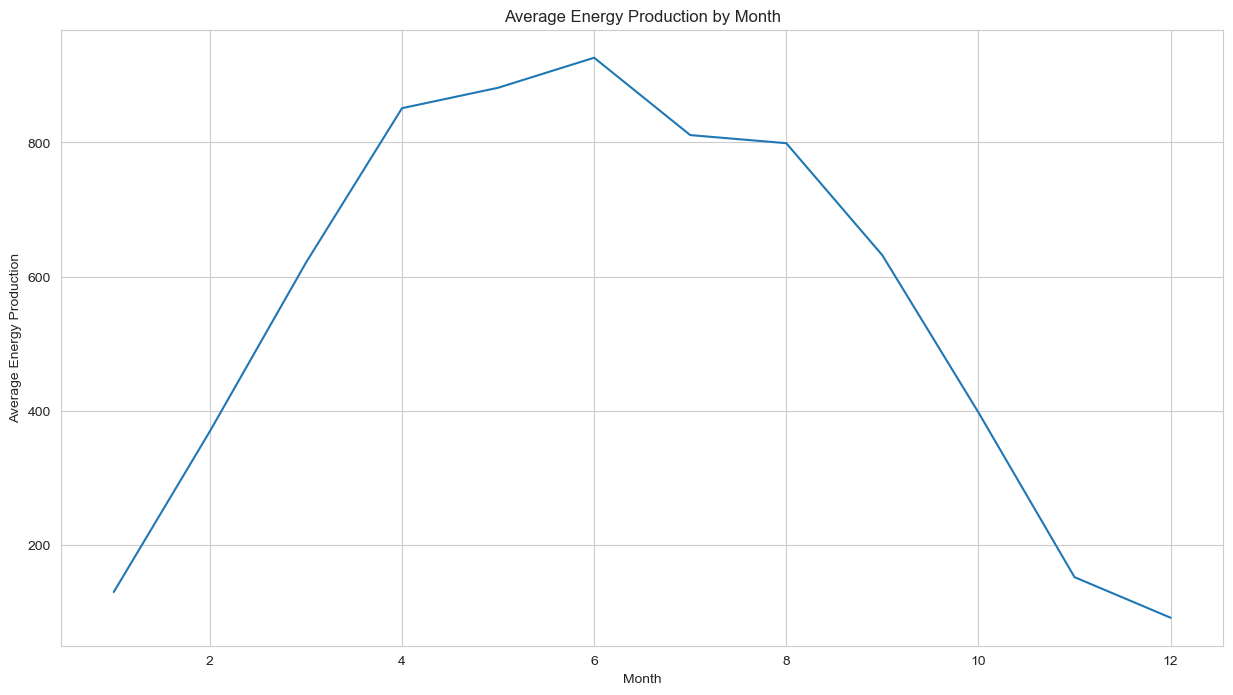

In [13]:

#plot the average energy production per month 
avg_energy = df.groupby("month")["Energy delta[Wh]"].mean()
plt.plot(avg_energy.index, avg_energy.values)
plt.title("Average Energy Production by Month")
plt.xlabel("Month")
plt.ylabel("Average Energy Production")
plt.show()


Text(0.5, 1.0, 'Energy Delta by Hour')

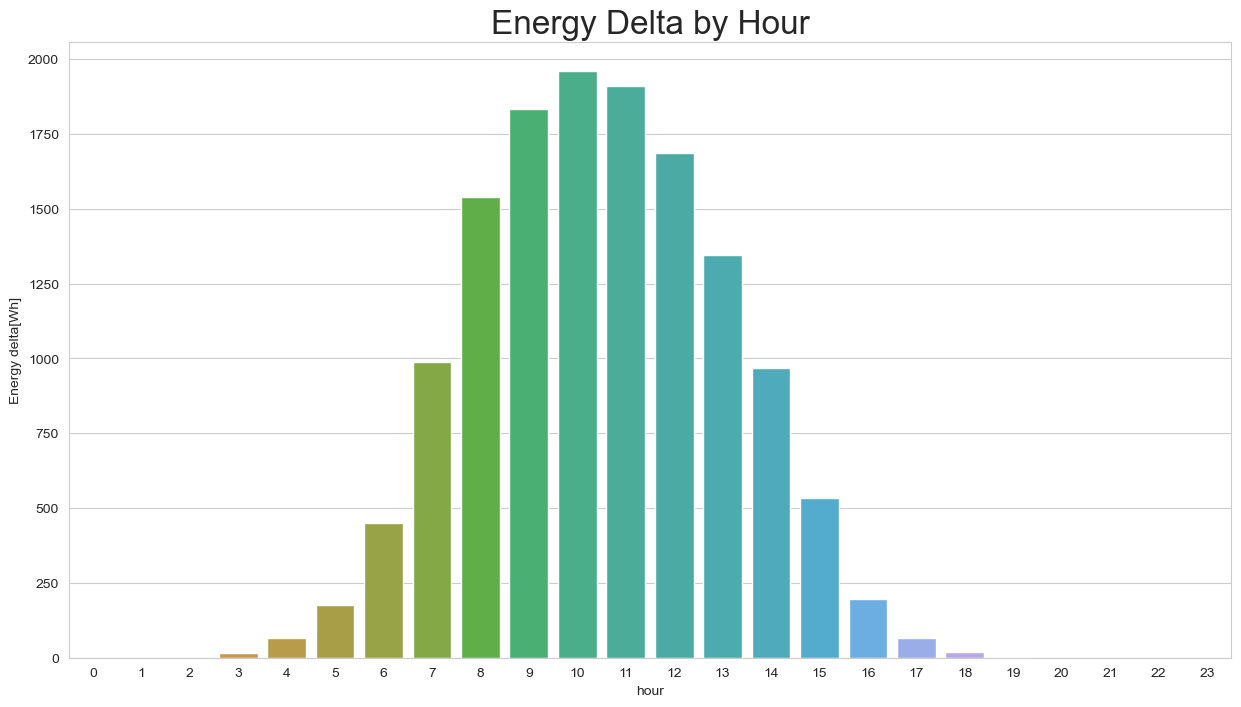

In [14]:
df_hour = df.groupby('hour').mean(numeric_only=False)
sns.barplot(data=df_hour, x=df_hour.index, y='Energy delta[Wh]')
plt.title('Energy Delta by Hour', fontsize=24)


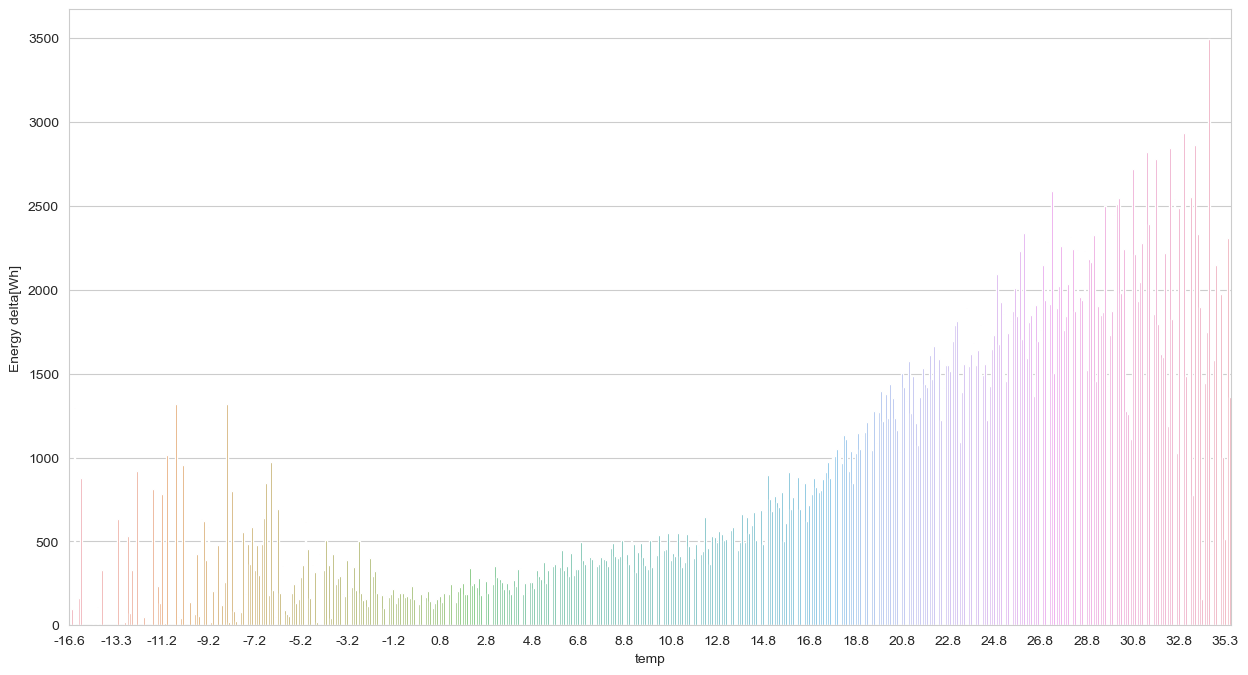

In [15]:
# More energy is used in warmer temperatures indicating greater use of air conditioners to cool rather than heaters to warm.
fig, ax = plt.subplots(1, 1, figsize=(15,8))

df_temp = df.groupby('temp').mean() 
sns.barplot(data=df_temp, x=df_temp.index, y='Energy delta[Wh]')

# only put labels every 20th label - roughly every 2 degrees - saves x axis being so cluttered
for i, label in enumerate(ax.get_xticklabels()):
    if i % 20 != 0:  # Display every twentieth label
        label.set_visible(False)

<Axes: >

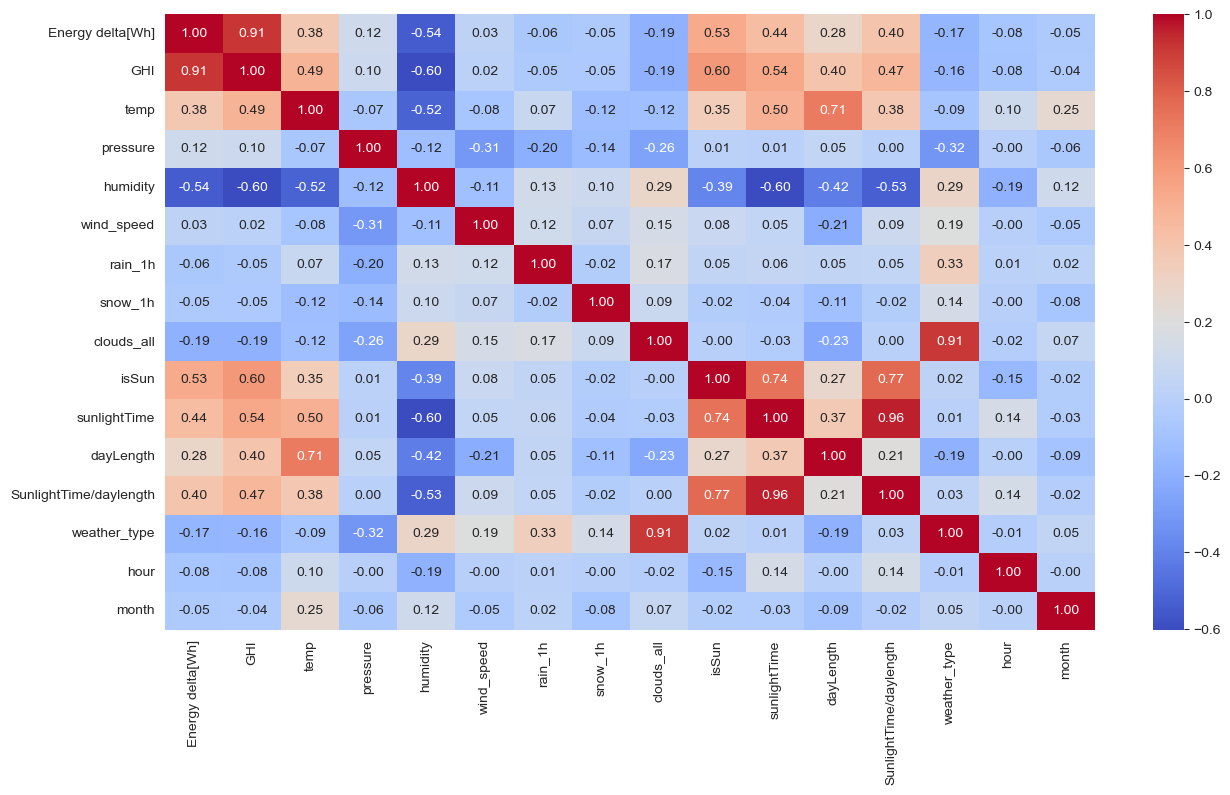

In [16]:
# get correlations for all columns 
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [17]:
#Based on the correlations above a model will be developed to see if we can forecast energy usage based on all the features (predictors)
# form the correlation variable created above let's get the top 3 (using absolute value to get either positive or negative) correlations with Energy delta
corr[['Energy delta[Wh]']].abs().sort_values(by='Energy delta[Wh]', axis=0, ascending=False)

,Energy delta[Wh]
Energy delta[Wh],1.000000
GHI,0.914619
humidity,0.544407
isSun,0.526952
sunlightTime,0.437296
SunlightTime/daylength,0.402523
temp,0.378554
dayLength,0.280695
clouds_all,0.190241
weather_type,0.170046


In [18]:
#Predictions of Energy delta based using XGBoost
df.index.min(),df.index.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2022-08-31 17:45:00'))

In [19]:
# Splitting the data into training and testing sets
X = df.drop(['Energy delta[Wh]', 'GHI'], axis=1)  # Exclude 'Energy delta[Wh]' and 'GHI' from predictors
y_energy = df['Energy delta[Wh]']  # Target variable for energy delta prediction
y_ghi = df['GHI']  # Target variable for GHI prediction

In [20]:
# Splitting the data into training and testing sets with stratification by month
X_train, X_test, y_energy_train, y_energy_test, y_ghi_train, y_ghi_test = train_test_split(X, y_energy, y_ghi, test_size=0.30, stratify=X.index.month)

In [21]:
# Initializing XGBRegressor for energy delta prediction
regr_energy = XGBRegressor(objective='reg:squarederror')
regr_energy.fit(X_train, y_energy_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
# Initializing XGBRegressor for GHI prediction
regr_ghi = XGBRegressor(objective='reg:squarederror')
regr_ghi.fit(X_train, y_ghi_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
# Making predictions for energy delta and GHI
y_energy_pred = regr_energy.predict(X_test)
y_ghi_pred = regr_ghi.predict(X_test)


In [24]:
# Storing the original and predicted values in dataframes
df_final_energy = pd.DataFrame(data={'Predictions': y_energy_pred, 'Actuals': y_energy_test})
df_final_ghi = pd.DataFrame(data={'Predictions': y_ghi_pred, 'Actuals': y_ghi_test})

In [25]:
# Handling negative predictions for energy delta
df_final_energy.loc[df_final_energy['Predictions'] < 0, 'Predictions'] = 0

In [26]:
# Calculating evaluation metrics for energy delta prediction
energy_accuracy = regr_energy.score(X_test, y_energy_test)
energy_r2 = r2_score(df_final_energy['Actuals'], df_final_energy['Predictions'])
energy_mae = mean_absolute_error(df_final_energy['Actuals'], df_final_energy['Predictions'])
energy_rmse = mean_squared_error(df_final_energy['Actuals'], df_final_energy['Predictions'], squared=True)

In [27]:
# Calculating evaluation metrics for GHI prediction
ghi_accuracy = regr_ghi.score(X_test, y_ghi_test)
ghi_r2 = r2_score(df_final_ghi['Actuals'], df_final_ghi['Predictions'])
ghi_mae = mean_absolute_error(df_final_ghi['Actuals'], df_final_ghi['Predictions'])
ghi_rmse = mean_squared_error(df_final_ghi['Actuals'], df_final_ghi['Predictions'], squared=True)

Text(0, 0.5, 'Energy Delta')

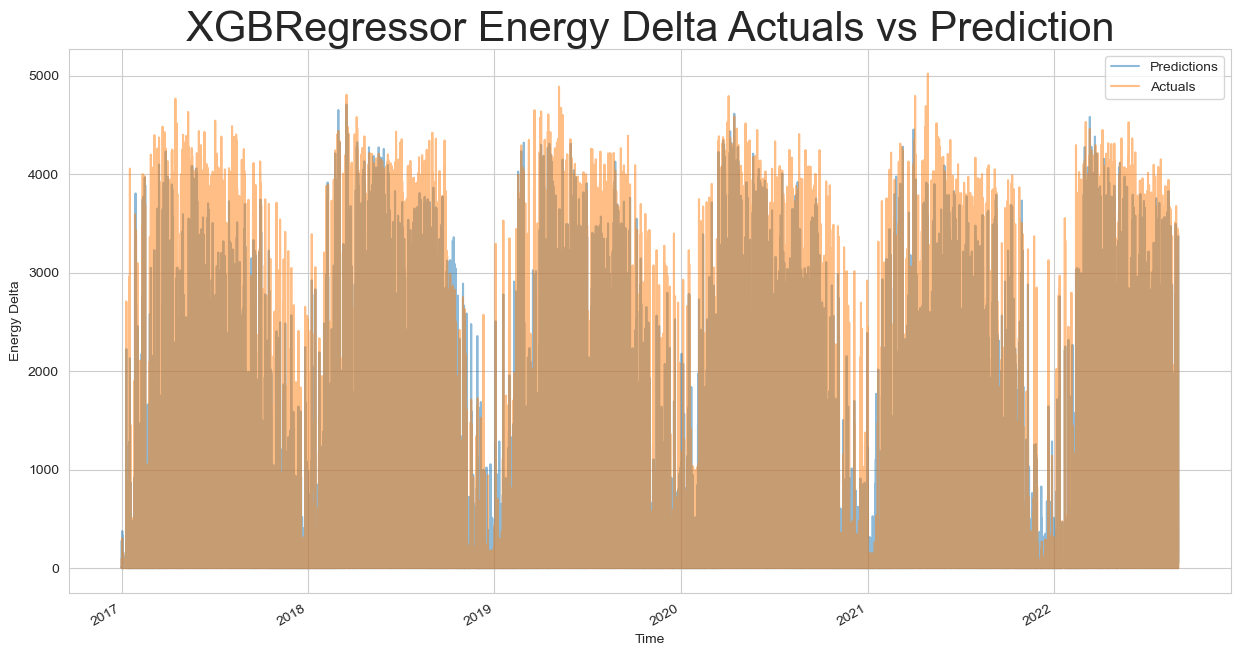

In [28]:
# Plotting actual vs predicted values for energy delta
df_final_energy.plot(alpha=0.5)
plt.title('XGBRegressor Energy Delta Actuals vs Prediction', fontsize=30)
plt.ylabel('Energy Delta')


Text(0, 0.5, 'GHI')

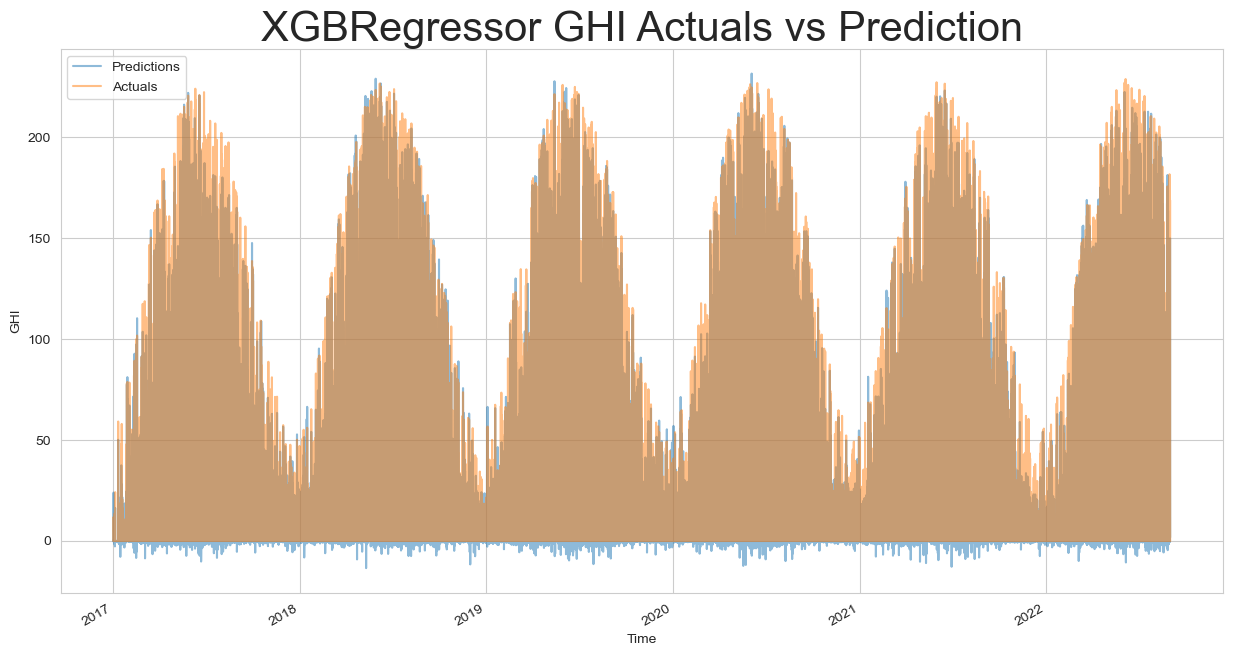

In [29]:
# Plotting actual vs predicted values for GHI
df_final_ghi.plot(alpha=0.5)
plt.title('XGBRegressor GHI Actuals vs Prediction', fontsize=30)
plt.ylabel('GHI')

In [30]:
# Displaying evaluation metrics
print('\nEnergy Delta Prediction Metrics:')
print('Accuracy: {:.2f}'.format(energy_accuracy))
print('R-squared: {:.2f}'.format(energy_r2))
print('MAE: {:.2f}'.format(energy_mae))
print('RMSE: {:.2f}'.format(energy_rmse))

print('\nGHI Prediction Metrics:')
print('Accuracy: {:.2f}'.format(ghi_accuracy))
print('R-squared: {:.2f}'.format(ghi_r2))
print('MAE: {:.2f}'.format(ghi_mae))
print('RMSE: {:.2f}'.format(ghi_rmse))


Energy Delta Prediction Metrics:
Accuracy: 0.87
R-squared: 0.87
MAE: 171.71
RMSE: 140646.25

GHI Prediction Metrics:
Accuracy: 0.93
R-squared: 0.93
MAE: 6.86
RMSE: 186.58


In [32]:
import joblib

# Define the filenames for saving the models
#energy_model_filename = "regr1_energy_model.h5"
#ghi_model_filename = "regr1_ghi_model.h5"

joblib.dump(regr_energy ,"solar_energy_model.joblib")

# Save the energy model to a file
#with open(energy_model_filename, 'wb') as file_energy:
    #pickle.dump(regr_energy, file_energy)

# Save the GHI model to a file
#with open(ghi_model_filename, 'wb') as file_ghi:
    #pickle.dump(regr_ghi, file_ghi)

#print("Energy model saved as:", energy_model_filename)
#print("GHI model saved as:", ghi_model_filename)


['solar_energy_model.joblib']